In [1]:
# MATPLOTLIB CHALLENGE: PYMACEUTICALS INC

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv 
import os

In [3]:
# Getting data 
CLINIC_PATH = os.path.join("c:/Users/User/Documents/Homework Data/clinicaltrial_data.csv")
MOUSE_PATH = os.path.join("c:/Users/User/Documents/Homework Data/mouse_drug_data.csv")

# function to load clinical trial data
def load_clinic_data(clinic_path=CLINIC_PATH):
    clinic_data = os.path.join(clinic_path)
    return pd.read_csv(clinic_data)

# function to load mouse drug data
def load_mouse_data(mouse_path=MOUSE_PATH):
    mouse_data = os.path.join(mouse_path)
    return pd.read_csv(mouse_data)

clinic_df = load_clinic_data()
mouse_df = load_mouse_data()

# combined data into single dataset
combined_df = pd.merge(clinic_df, mouse_df)
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
# Information for graphing references
combined_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


In [33]:
# Mean Tumor Volume Data Grouped by Drug and Timepoint
drug_time_group = combined_df.groupby(['Drug', 'Timepoint'])
drug_time_avg = drug_time_group['Tumor Volume (mm3)'].mean()

dt_avg_df = pd.DataFrame({
    'Tumor Volume (mm3)': drug_time_avg.map("{:,.2f}".format),
                                            })
dt_avg_df.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.00
1,Capomulin,5,44.27
2,Capomulin,10,43.08
3,Capomulin,15,42.06
4,Capomulin,20,40.72


In [34]:
# Standard Error of Tumor Volumes Grouped by Drup and Timepoint
drug_group = combined_df.groupby(['Drug', 'Timepoint'])
drug_time_std = drug_group['Tumor Volume (mm3)'].sem()

std_dt_df = pd.DataFrame({
    'Tumor Volume (mm3)': drug_time_std,
})
std_dt_df.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# reorganizes dataset of standard deviations for scatter plot error bars
tumor_std = std_dt_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')
tumor_std.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [10]:
# Reorganizing dataset -- pivotting 'Drug' column and grouping by 'Timepoint' column

# Tumor volumes for each drug
tumor_vol = combined_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')
tumor_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


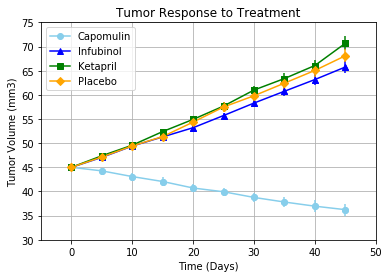

In [13]:
# assigns plot to tuples
x_axis = [0,5,10,15,20,25,30,35,40,45]

capo, = plt.plot(x_axis, tumor_vol.Capomulin, color='SkyBlue', marker='o', label='Capomulin')
infu, = plt.plot(x_axis, tumor_vol.Infubinol, color='b', marker='^', label='Infubinol')
keta, = plt.plot(x_axis, tumor_vol.Ketapril, color='g', marker='s', label='Ketapril')
plac, = plt.plot(x_axis, tumor_vol.Placebo, color='orange', marker='D', label='Placebo')
# legend and titles
plt.legend(handles=[capo, infu, keta, plac], loc = 'upper left')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(-5,50)
plt.ylim(30,75)
# scatter plots with respective error bars 
plt.errorbar(x_axis, tumor_vol.Capomulin, yerr=tumor_std.Capomulin, fmt='o', color='SkyBlue')
plt.errorbar(x_axis, tumor_vol.Infubinol, yerr=tumor_std.Infubinol, fmt='^', color='b')
plt.errorbar(x_axis, tumor_vol.Ketapril, yerr=tumor_std.Ketapril, fmt='s', color='g')
plt.errorbar(x_axis, tumor_vol.Placebo, yerr=tumor_std.Placebo, fmt='D', color='orange')
plt.grid()
# saves figure to Homework Data Folder
plt.savefig("c:/Users/User/Documents/Homework Data/tumor_response.png")
plt.show()

In [35]:
# METASTATIC RESPONSE TO TREATMENT
# grouping metastatic sites by treatment type and timepoints
meta_group = combined_df.groupby(['Drug', 'Timepoint'])
meta_avg = meta_group['Metastatic Sites'].mean()

meta_avg_df = pd.DataFrame({
    'Metastatic Sites': meta_avg,
})
meta_avg_df.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [15]:
# Reorganizing dataset to print mean values of metastatic sites for each drug treatment
meta_sites= meta_avg_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')
meta_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [36]:
meta_group = combined_df.groupby(['Drug', 'Timepoint'])
meta_std = meta_group['Metastatic Sites'].sem()

std_meta_df = pd.DataFrame({
    'Metastatic Sites': meta_std,
})
std_meta_df.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [17]:
# Reorganizing dataset to print standard deviations of metastatic sites for each drug
meta_std = std_meta_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')
meta_std.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


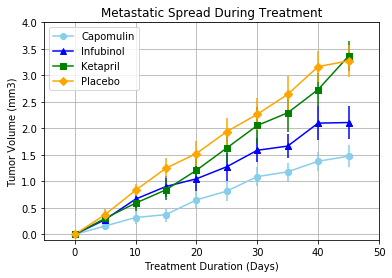

In [19]:
# assigns plot to tuples
x_axis = [0,5,10,15,20,25,30,35,40,45]
capo, = plt.plot(x_axis, meta_sites.Capomulin, color='SkyBlue', marker='o', label='Capomulin')
infu, = plt.plot(x_axis, meta_sites.Infubinol, color='b', marker='^', label='Infubinol')
keta, = plt.plot(x_axis, meta_sites.Ketapril, color='g', marker='s', label='Ketapril')
plac, = plt.plot(x_axis, meta_sites.Placebo, color='orange', marker='D', label='Placebo')
# legend and titles
plt.legend(handles=[capo, infu, keta, plac], loc = 'upper left')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(-5,50)
plt.ylim(-0.1,4)
# scatter plots with respective error bars 
plt.errorbar(x_axis, meta_sites.Capomulin, yerr=meta_std.Capomulin, fmt='o', color='SkyBlue')
plt.errorbar(x_axis, meta_sites.Infubinol, yerr=meta_std.Infubinol, fmt='^', color='b')
plt.errorbar(x_axis, meta_sites.Ketapril, yerr=meta_std.Ketapril, fmt='s', color='g')
plt.errorbar(x_axis, meta_sites.Placebo, yerr=meta_std.Placebo, fmt='D', color='orange')
plt.grid()
# saves figure to Homework Data Folder
plt.savefig("c:/Users/User/Documents/Homework Data/metstatic_spread.png")
plt.show()

In [37]:
# SURVIVAL RATES
# count of mice grouped by drup and timepoint
mice_group = combined_df.groupby(['Drug', 'Timepoint'])
mice_count = mice_group['Mouse ID'].count()

mice_count_df = pd.DataFrame({
    'Mouse Count': mice_count,
})
mice_count_df.reset_index().head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Reorganizing dataset to print counts of mice during each treatment per timepoint
mouse_counts = mice_count_df.pivot_table('Mouse Count', ['Timepoint'], 'Drug')
mouse_counts.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [22]:
# converting mice count to survival rate (%)
surv_rate = (mouse_counts / mouse_counts.max()) * 100
surv_rate

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


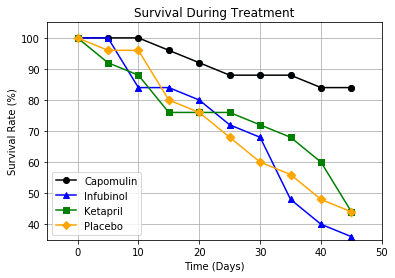

In [24]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
# assigns plot to tuples
capo, = plt.plot(x_axis, surv_rate.Capomulin, color='black', marker='o', label='Capomulin')
infu, = plt.plot(x_axis, surv_rate.Infubinol, color='b', marker='^', label='Infubinol')
keta, = plt.plot(x_axis, surv_rate.Ketapril, color='g', marker='s', label='Ketapril')
plac, = plt.plot(x_axis, surv_rate.Placebo, color='orange', marker='D', label='Placebo')
# legend and titles
plt.legend(handles=[capo, infu, keta, plac], loc = 'lower left')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.xlim(-5,50)
plt.ylim(35,105)
# scatter plots 
plt.scatter(x_axis, surv_rate.Capomulin, marker='o', cmap='winter', alpha=1)
plt.scatter(x_axis, surv_rate.Infubinol, marker='^', color='b', alpha=1)
plt.scatter(x_axis, surv_rate.Ketapril, marker='s', color='g', alpha=1)
plt.scatter(x_axis, surv_rate.Placebo, marker='D', color='orange', alpha=1)
plt.grid()
# saves figure to Homework Data Folder
plt.savefig("c:/Users/User/Documents/Homework Data/survival_rate.png")
plt.show()

In [25]:
# SUMMARY BAR GRAPH

In [26]:
# percentage change for each drug
# Reorganizing dataset for Tumor volumes for each drug
tumor_vol = combined_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')
tumor_vol

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [39]:
# finds percentage change between each timepoint
tumor_change = tumor_vol.loc[45] - tumor_vol.loc[0]
tumor_perc_change = (tumor_change / tumor_vol.loc[0]) * 100
tumor_perc_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [42]:
# Percentages for each drug treatment
capo_perc = tumor_perc_change["Capomulin"]
infu_perc = tumor_perc_change["Infubinol"]
keta_perc = tumor_perc_change["Ketapril"]
plac_perc = tumor_perc_change["Placebo"]
print(capo_perc,infu_perc,keta_perc,plac_perc)

-19.475302667894155 46.12347172785184 57.02879468660604 51.29796048315153


In [46]:
# x axis and tick locations
treatments = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
percentages = [capo_perc, infu_perc, keta_perc, plac_perc]
perc_x = np.arange(len(percentages))
perc_x

array([0, 1, 2, 3])

In [55]:
# loop to conditionally format bar graph
colors = ['orange' if (x < 0) else 'LightSeaGreen' for x in percentages]
colors

['orange', 'LightSeaGreen', 'LightSeaGreen', 'LightSeaGreen']

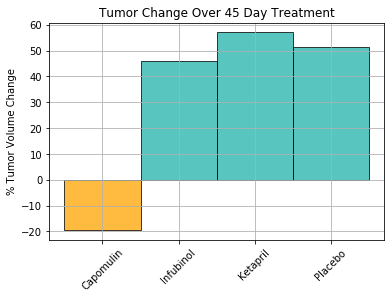

In [74]:
# Ticks for the bar chart
tick_locations = [value for value in perc_x]
rects1 = plt.bar(perc_x, percentages, width=1, color=colors, edgecolor='black', alpha=0.75, 
        align='center')
plt.xticks(tick_locations, treatments, rotation='45')
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.grid()

# # adding values labels to bar graph
# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         rects1.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                '%d' % int(height), ha='center', va='bottom')
# autolabel(rects1)
#saves fig
plt.savefig("c:/Users/User/Documents/Homework Data/tumor_change_45_days.png")
plt.show()